# **Optimizing Customer Strategy Through CLV Modeling**

## **1. Latar Belakang & Pernyataan Masalah**

**1.1 Latar Belakang Bisnis**

Industri asuransi menghadapi tantangan besar dalam mempertahankan pelanggan dan meningkatkan profitabilitas. Biaya untuk mendapatkan customer baru terus meningkat, sedangkan beberapa customer memiliki masa langganan yang relatif rendah. Profitabilitas jangka panjang perusahaan sangat bergantung pada **Customer Lifetime Value (CLV)**, yaitu nilai total keuntungan yang diberikan customer kepada perusahaan.

**1.2 Masalah**

Perusahaan memiliki kesulitan untuk menentukan customer yang memberikan kentungan terbesar dan strategi retensi yang paling efektif. Sehingga, dapat berdampak kepada kehilangan customer high value, sedangkan penghabisan anggaran pada customer bernilai rendah.  

**1.3 Tujuan (Goals)**
1.  Membangun model Machine Learning (Regresi) untuk memprediksi nilai CLV berdasarkan demografi dan perilaku polis.
2.  Mengidentifikasi faktor-faktor terpenting (Feature Importance) yang mempengaruhi nilai pelanggan untuk merumuskan strategi *cross-selling* dan retensi yang efektif.

## **2. Data Understanding**

**2.1 Penjelasan dataset (Data Dictionary)**

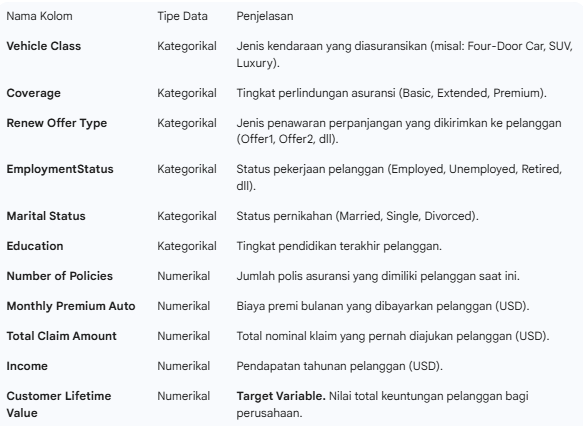

**2.2 Import dan Load Dataset**



In [33]:
# Import data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# train test split & hyperparameter tuning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, cross_val_score

# encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# warnings
import warnings
warnings.filterwarnings('ignore')

Berikut adalah tampilan 5 baris teratas :



In [34]:
# load data
df = pd.read_csv(r"C:\Users\T490s\OneDrive\Desktop\PURWADHIKA COURSE\1001 - [Module 03] Machine Learning\Capstone Project\data_customer_lifetime_value.csv")
display(df.head(), df.tail())

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940
5668,Luxury SUV,Basic,Offer2,Employed,Divorced,College,1.0,199.0,161.615740,60184.0,7664.219255


**2.3 Informasi Dataset**

Secara umum, informasi dari dataset sebagai berikut:
*   Jumlah baris 5669
*   Jumlah kolom 11
*   Terdapat 6 kolom tipe kategori (Vehicle Class, Coverage, Renew Offer Type, EmploymentStatus, Marital Status, dan Education)
*   Terdapat 5 kolom tipe numerik (Number Of Policies, Monthly Premium Auto, Total Claim Amount, income, dan Customer Lifetime Value)





In [35]:
print(f"Jumlah baris dan kolom di dataset : {df.shape}")
print("=" * 60)
print(f"Informasi Tipe Data: {df.info()}")
print("=" * 60)

Jumlah baris dan kolom di dataset : (5669, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB
Informasi Tipe Data: None


**2.4 Statistik Deskriptif**

Berdasarkan statistik deskriptif, kita bisa melihat bahwa:

*   Count data pada semua kolom memiliki jumlah yang konsisten 5669. Artinya, data memiliki jumlah yang sama.
*   Total Claim Amount : Nilai 75% adalah ~549, tapi Max-nya ~2759. Artinya, terdapat lonjakan besar yang mengindikasikan beberapa customer yang memiliki nilai Claim sangat besar.
*   Income : Nilai standar deviasi ~30490 mendekati nilai mean ~37868. Hal ini mengindikasikan terdapat gap yang sangat besar pendapatan antar customer. Sehingga, saya asumsikan untuk nilai minimum income 0 adalah nasabah yang tidak memiliki pekerjaan.
*   Dapat dilihat juga untuk kategori paling top dari masing-masing kolom kategorikal
    1. Vehicle Class : Four-Door Car
    2. Coverage : Basic
    3. Renew Offer Type : Offer1
    4. EmploymentStatus	: Employed
    5. Marital Status : Married
    6. Education : Bachelor


In [4]:
# menampilkan statistik deskriptif kolom numerikal dan kategorikal
display(
    df.describe(),
    df.describe(include='object')
)

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


Dibawah ini adalah daftar unik untuk kolom kategori serta jumlahnya, dimana selanjutnya akan dilakukan encoding untuk modeling.

In [36]:
# unique value untuk kolom kategorikal
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
  print(f"\nValue Counts for {col}:")
  print(df[col].value_counts())


Value Counts for Vehicle Class:
Vehicle Class
Four-Door Car    2858
Two-Door Car     1186
SUV              1096
Sports Car        307
Luxury SUV        115
Luxury Car        107
Name: count, dtype: int64

Value Counts for Coverage:
Coverage
Basic       3477
Extended    1704
Premium      488
Name: count, dtype: int64

Value Counts for Renew Offer Type:
Renew Offer Type
Offer1    2292
Offer2    1835
Offer3     900
Offer4     642
Name: count, dtype: int64

Value Counts for EmploymentStatus:
EmploymentStatus
Employed         3541
Unemployed       1429
Medical Leave     267
Disabled          252
Retired           180
Name: count, dtype: int64

Value Counts for Marital Status:
Marital Status
Married     3305
Single      1514
Divorced     850
Name: count, dtype: int64

Value Counts for Education:
Education
Bachelor                1703
College                 1660
High School or Below    1620
Master                   460
Doctor                   226
Name: count, dtype: int64


**2.5 Missing Value**

Tidak ditemukan kolom yang ada data null

In [37]:
# cek data null
df.isnull().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

**2.6 Duplicated Data**

Ditemukan ada 618 data yang duplikat

In [38]:
# cek data duplikat
df.duplicated().sum()

np.int64(618)

In [39]:
# drop data duplikat
df = df.drop_duplicates()
print(f"Jumlah data yang duplikat sekarang adalah {df.duplicated().sum()}")

Jumlah data yang duplikat sekarang adalah 0


## **3. Exploratory Data Analysis (EDA)**

**3.1 Distribusi Target Customer Lifetime Value (CLV)**

Berdasarkan histogram CLV, distribusi data menunjukkan *right-skewed* (miring ke kanan). Hal ini menunjukkan sebagian kecil pelanggan menyumbang nilai mayoritas bagi perusahaan). Pada boxplot, ditemukan juga outlier dimana terdapat beberapa customer yang memiliki nilai sangat tinggi.


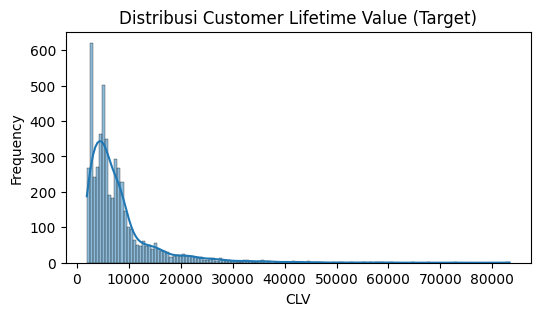

In [40]:
# histogram CLV
plt.figure(figsize=(6, 3))
sns.histplot(df['Customer Lifetime Value'], kde=True)
plt.title('Distribusi Customer Lifetime Value (Target)')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.show()

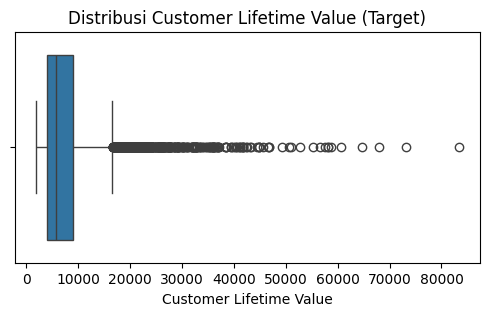

In [41]:
# boxplot CLV
plt.figure(figsize=(6, 3))
sns.boxplot(x='Customer Lifetime Value', data=df)
plt.title('Distribusi Customer Lifetime Value (Target)')
plt.show()

**3.2 Distribusi Income, Total Claim Amount, dan Monthly Premium Auto**

Berdasarkan statistik deskriptif diatas, saya menemukan beberapa fitur yang harus dilihat kembali persebarannya sebagai berikut

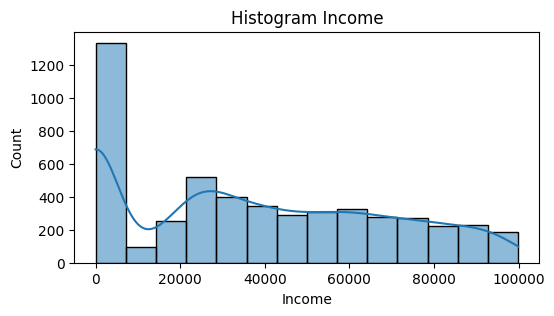

In [42]:
# histogram income
plt.figure(figsize=(6, 3))
sns.histplot(df['Income'], kde=True)
plt.title('Histogram Income')
plt.show()

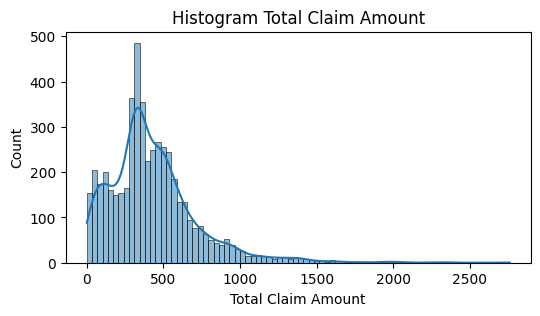

In [43]:
# histogram total claim amount
plt.figure(figsize=(6, 3))
sns.histplot(df['Total Claim Amount'], kde=True)
plt.title('Histogram Total Claim Amount')
plt.show()

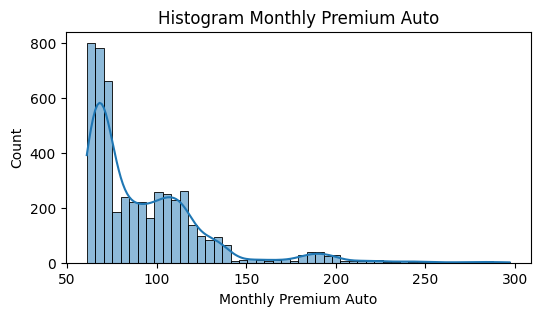

In [13]:
# histogram monthly premium auto
plt.figure(figsize=(6, 3))
sns.histplot(df['Monthly Premium Auto'], kde=True)
plt.title('Histogram Monthly Premium Auto')
plt.show()

**3.3 Cek Korelasi Data**

Korelasi data numerik bertujuan untuk mengetahui korelasi antar fitur. Nilai korelasi semakin mendekati satu (1), maka akan semakin memiliki korelasi yang kuat. Berdasarkan heatmap correlations, ditemukan hampir semua fitur berkorelasi rendah, kecuali:

*   Monthly Premium Auto memiliki korelasi sangat tinggi dengan Total Claim Amount (0.63)
*   Customer Lifetime Value memiliki korelasi cukup tinggi dengan Monthly Premium Auto (0.42)
*   Total Claim Amount memiliki korelasi negatif dengan income (-0.36)

Korelasi positif antara Monthly Premium Auto dan Total Claim Amount mengindikasikan semakin mahal mobil/premi, semakin besar juga klaim yang diajukan.


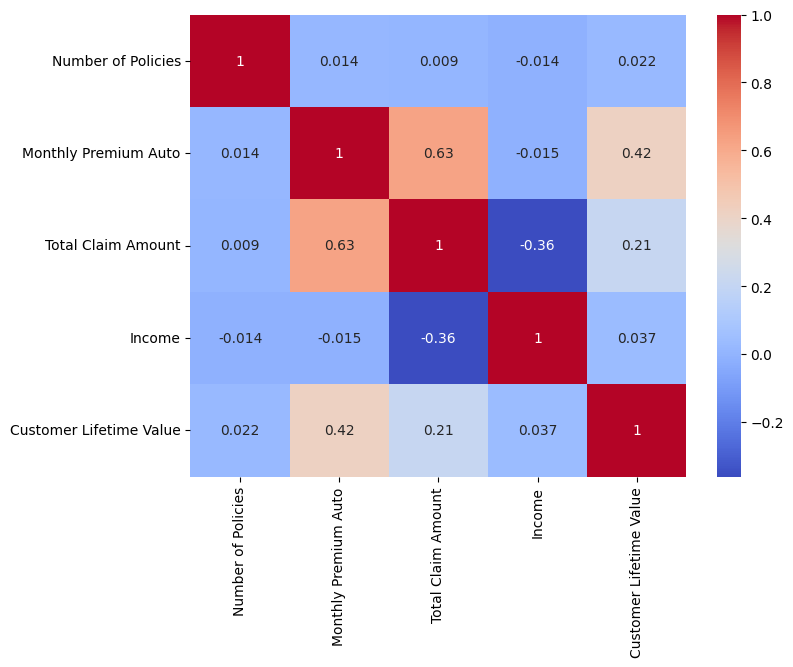

In [44]:
# Cek korelasi fitur numerik
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

## **4. Data Preprocessing**

In [46]:
# define X (fitur) dan y (target)
X = df.drop(columns=['Customer Lifetime Value'], axis=1)
y = df['Customer Lifetime Value']

In [47]:
# split data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# preprocessing
preprocessor = ColumnTransformer(
    transformers=[

        # scaling : Income, Number of Policies, Total Claim Amount, Monthly Premium Auto
        ('Scaling', Pipeline([
            ('Scaling', StandardScaler())
        ]),
        ['Income', 'Number of Policies', 'Total Claim Amount', 'Monthly Premium Auto']),

        # one hot encoding : Vehicle Class, Renew Offer Type, EmploymentStatus, Marital Status
        ('One Hot', Pipeline([
            ('One Hot', OneHotEncoder())
        ]),
        ['Vehicle Class', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status']),

        # ordinal encoding : Coverage, Education
        ('Ordinal', Pipeline([
            ('Ordinal', OrdinalEncoder(categories=[
            ['Basic', 'Extended', 'Premium'],
            ['High School or Below', 'College','Bachelor', 'Master', 'Doctor']
            ]))
        ]),
        ['Coverage', 'Education'])
      ],
      remainder='passthrough'
    )

In [49]:
# tampilan DataFrame hasil encoding
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_train_preprocessed= pd.DataFrame(X_train_preprocessed, columns=preprocessor.get_feature_names_out())
X_train_preprocessed.head()

,Scaling__Income,Scaling__Number of Policies,Scaling__Total Claim Amount,Scaling__Monthly Premium Auto,One Hot__Vehicle Class_Four-Door Car,One Hot__Vehicle Class_Luxury Car,One Hot__Vehicle Class_Luxury SUV,One Hot__Vehicle Class_SUV,One Hot__Vehicle Class_Sports Car,One Hot__Vehicle Class_Two-Door Car,...,One Hot__EmploymentStatus_Disabled,One Hot__EmploymentStatus_Employed,One Hot__EmploymentStatus_Medical Leave,One Hot__EmploymentStatus_Retired,One Hot__EmploymentStatus_Unemployed,One Hot__Marital Status_Divorced,One Hot__Marital Status_Married,One Hot__Marital Status_Single,Ordinal__Coverage,Ordinal__Education
0,-0.460489,1.668227,-0.412017,-0.841051,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.564228,-0.841880,-0.128657,-0.003546,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0
2,-1.240144,-0.005178,0.324625,-0.581136,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0
3,0.752163,-0.423529,-0.668351,-0.841051,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.662663,-0.841880,-0.395827,-0.812172,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## **5. Modeling**

Kita akan membandingkan 5 algoritma:
1. Linear Regression
2. KNN
3. Random Forest Regressor
4. Gradient Boosting Regressor
5. XGBoost Regressor

Selanjutnya, model akan dipilih berdasarkan skor **RMSE** terendah pada data validasi (Cross-Validation) 

In [50]:
# create model
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(
        objective='reg:squarederror',
         random_state=42)
}

In [51]:
# model comparison dengan cross validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

hasil = []

for name, model in models.items():
    # Membuat pipeline
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    scores = cross_val_score(pipe, X_train, y_train,
                             scoring='neg_mean_squared_error',
                             cv=cv)
    
    rmse_per_fold = np.sqrt(-scores)

    print(f"\n=== {name} ===")
    print("RMSE per fold:", rmse_per_fold)

    # tambahkan di hasil[]
    hasil.append({
        'Model': name,
        'RMSE_CV_mean': -scores.mean(),
        'RMSE_CV_std':scores.std(),
    })

# membuat DataFrame : diurutkan dari terkecil
hasil_df = pd.DataFrame(hasil)
hasil_df = hasil_df.sort_values(by='RMSE_CV_mean', ascending=True).reset_index(drop=True)
print("PERBANDINGAN MODEL")
hasil_df


=== Linear Regression ===
RMSE per fold: [7187.88035335 5954.37337645 6056.76440484 5956.08955766 6575.49760772]

=== KNN ===
RMSE per fold: [7189.70269785 6595.77731334 6447.99257193 6312.95330467 6901.30310849]

=== Random Forest ===
RMSE per fold: [4969.74634093 4111.42364012 3936.98560915 3709.65405946 4619.35979225]

=== Gradient Boosting ===
RMSE per fold: [4882.07143008 3826.19852423 3681.54301123 3490.57363563 4167.21863417]

=== XGBoost ===
RMSE per fold: [5172.4627992  4563.38597385 4201.6665546  3898.11384358 5007.49626592]
PERBANDINGAN MODEL


,Model,RMSE_CV_mean,RMSE_CV_std
0,Gradient Boosting,1.631560e+07,4.126591e+06
1,Random Forest,1.844041e+07,4.011506e+06
2,XGBoost,2.110064e+07,4.349462e+06
3,Linear Regression,4.050335e+07,6.283774e+06
4,KNN,4.485082e+07,4.289989e+06


## **6. Hyperparameter Tuning**

Meskipun Gradient Boosting dan Random Forest memiliki RMSE terendah pada tahap awal, **XGBoost** dipilih sebagai kandidat utama untuk optimasi. Berdasarkan Chen & Guestrin (2016), XGBoost banyak digunakan pada kompetisi data science di Kaggle karena kemampuannya manangani data sparse dan memiliki mekanisme regularisasi. 

Data CLV yang dipakai sebagai resource memiliki outlier yang dapat cukup mempengaruhi model. Oleh karena itu, tahap *hyperparameter tuning* dilakukan pada Gradient Boosting dan XGBoost untuk membandingkan performa optimal keduanya.  

_Referensi : Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System_

**6.1 Tuning XGBoost**


In [52]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42 
)

pipe_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

param_xgb = {
    'model__n_estimators': [200, 400, 600],
    'model__max_depth': [3, 4, 5],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.7, 1.0],
}

xgb_rscv = RandomizedSearchCV(
    pipe_xgb,
    param_distributions=param_xgb,
    n_iter=20,           
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
)

xgb_rscv.fit(X_train, y_train)

print("Best XGBoost params:", xgb_rscv.best_params_)
print("Best XGBoost CV RMSE:", -xgb_rscv.best_score_)

Best XGBoost params: {'model__subsample': 0.7, 'model__n_estimators': 600, 'model__max_depth': 3, 'model__learning_rate': 0.01}
Best XGBoost CV RMSE: 3924.0656333324196


**6.2 Tuning Gradient Boosting**


In [58]:
gbr_model = GradientBoostingRegressor(random_state=42)

pipe_gbr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', gbr_model)
])

param_gbr = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [2, 3, 4]
}

gbr_grid = GridSearchCV(
    pipe_gbr,
    param_grid=param_gbr,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1
)

gbr_grid.fit(X_train, y_train)

print("Best GBR params:", gbr_grid.best_params_)
print("Best GBR CV RMSE:", -gbr_grid.best_score_)

Best GBR params: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100}
Best GBR CV RMSE: 3926.512051379896


**6.3 Perbandingan tuning model XGBoost dan Gradient Boosting**

Didapatkan model XGBoost memiliki CV RMSE yang lebih rendah yaitu ~ 3924. Shingga, model terbaik yang dipakai adalah XGBoost.


In [59]:
results_compare = pd.DataFrame({
    "Model": ["XGBoost (Tuned)", "GradientBoosting (Tuned)"],
    "CV RMSE": [-xgb_rscv.best_score_, -gbr_grid.best_score_]
})

results_compare

,Model,CV RMSE
0,XGBoost (Tuned),3924.065633
1,GradientBoosting (Tuned),3926.512051


## **7. Evaluasi Model dan Feature Importance**

**7.1 Evaluasi Model**

In [60]:
# evaluasi 
y_pred = xgb_rscv.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test  = mean_absolute_error(y_test, y_pred)
r2_test   = r2_score(y_test, y_pred)

rmse_test, mae_test, r2_test

(np.float64(3907.582681534065), 1624.2466169049828, 0.6791983383846958)

**7.2 Feature Importance**

In [61]:
# mengurutkan features importance
best_model_xgb = xgb_rscv.best_estimator_

feature_names = best_model_xgb.named_steps['preprocessor'].get_feature_names_out()
importance = best_model_xgb.named_steps['model'].feature_importances_

fi = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

fi.head(15)

,Feature,Importance
1,Scaling__Number of Policies,0.479454
3,Scaling__Monthly Premium Auto,0.149176
20,One Hot__Marital Status_Married,0.034503
6,One Hot__Vehicle Class_Luxury SUV,0.030889
10,One Hot__Renew Offer Type_Offer1,0.028057
8,One Hot__Vehicle Class_Sports Car,0.026460
11,One Hot__Renew Offer Type_Offer2,0.025011
0,Scaling__Income,0.024819
13,One Hot__Renew Offer Type_Offer4,0.024430
14,One Hot__EmploymentStatus_Disabled,0.019650


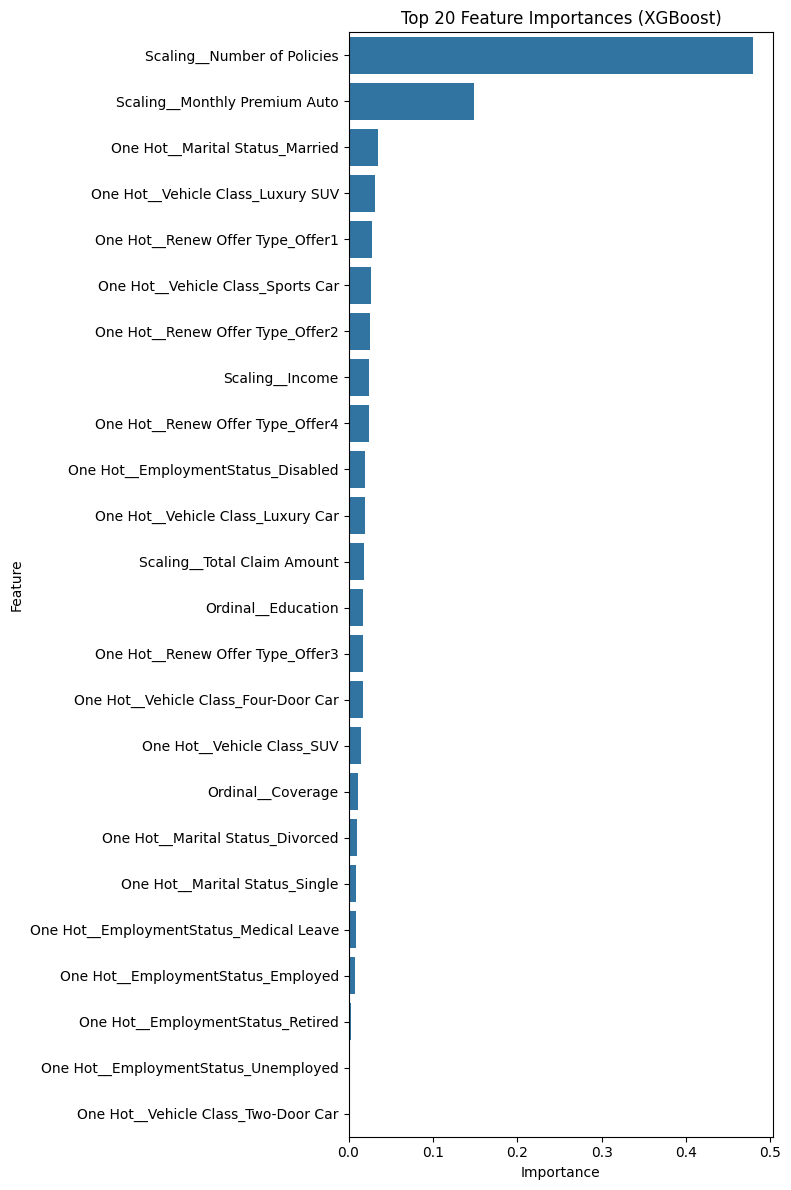

In [62]:
# visualisasi top 20
plt.figure(figsize=(8, 12))
sns.barplot(y='Feature', x='Importance', data=fi)
plt.title("Top 20 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

In [27]:
# perbandingan nilai aktual dan prediksi CLV
comparison_df = pd.DataFrame({
    "Actual CLV": y_test.values,
    "Predicted CLV": y_pred
})

comparison_df.head(10)

,Actual CLV,Predicted CLV
0,9624.524417,10075.771484
1,8377.499751,12222.576172
2,16350.130610,23847.140625
3,5160.251878,5435.169434
4,14727.505260,12501.104492
5,5955.544552,6203.061035
6,18745.395920,16716.400391
7,20314.997600,17697.847656
8,2199.739520,2403.470459
9,5678.050167,5599.849121


In [63]:
# nilai error 
comparison_df["Error"] = comparison_df["Actual CLV"] - comparison_df["Predicted CLV"]
comparison_df.head(10)

,Actual CLV,Predicted CLV,Error
0,9624.524417,10075.771484,-451.247067
1,8377.499751,12222.576172,-3845.076421
2,16350.130610,23847.140625,-7497.010015
3,5160.251878,5435.169434,-274.917556
4,14727.505260,12501.104492,2226.400768
5,5955.544552,6203.061035,-247.516483
6,18745.395920,16716.400391,2028.995529
7,20314.997600,17697.847656,2617.149944
8,2199.739520,2403.470459,-203.730939
9,5678.050167,5599.849121,78.201046


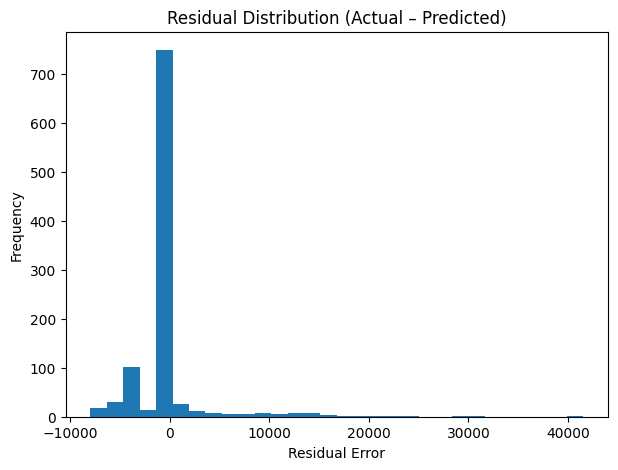

In [64]:
# visualisasi nilai error
residuals = comparison_df["Error"]

plt.figure(figsize=(7,5))
plt.hist(residuals, bins=30)
plt.title("Residual Distribution (Actual – Predicted)")
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.show()

In [65]:
# simpan model dengan pickle 
import pickle

filename = 'final_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(best_model_xgb, file)

print("Model berhasil disimpan sebagai file .pkl!")

Model berhasil disimpan sebagai file .pkl!


## **8. Kesimpulan dan Rekomendasi Bisnis**

**8.1 Kesimpulan Model:**


Berdasarkan perbandingan beberapa algoritma (Linear Regression, Random Forest, KNN, XGBoost, dan Gradient Boosting Regressor), berikut hasilnya:
* **XGBoost** yang telah di-tuning memberikan performa terbaik dengan RMSE terendah (~3907) dan R-Squared ~0.68
* **Fitur Paling Berpengaruh:** model XGBoost menunjukkan fitur yang paling berpengaruh pada nilai CLV adalah **`Number of Policies`** (~48%) dan diikuti oleh **`Monthly Premium Auto`**.

**8.2 Rekomendasi Bisnis:**
1.  **Optimasi Feature Importance untuk Strategi Cross-Selling**
    Berdasarkan *Feature Importance* dari model *XGBoost*, variabel jumlah polis menjadi faktor yang sangat mempengaruhi CLV. Tim marketing dapat fokus menawarkan produk tambahan (asuransi properti, jiwa, dll) kepada pelanggan yang hanya memiliki 1 polis kendaraan. Berikan insentif seperti diskon khusus misal pembelian bundling

2.  **Segmentasi Layanan:**
    Dengan menggunakan prediksi model, kita dapat mengetahui customer yang memiliki nilai CLV yang tinggi. Sehingga, kita dapat memberikan *priority support* saat klaim untuk menjaga loyalitas customer 

3.  **Edukasi Pelanggan:**
    Untuk segmen dengan Total Claim Amount tinggi namun CLV rendah, diberikan program edukasi dan pelatihan berkendara aman. Jika masih sering klaim, maka pertimbangkan harga premi pada saat renewal.